## BÀI 1: LOGICAL THINKING

Tú là một người bán hàng và đang muốn bán mĩ phẩm online. Sau một hồi nghiên cứu tìm hiểu thì anh ta quyết định lựa chọn bán hàng trên một sàn thương mại điện tử tên là ABC.vn vì đây có vẻ là một sàn thương mại điện tử uy tín. Tuy nhiên anh ta còn đang băn khoăn không biết rằng liệu tổng số đơn hàng và doanh thu mà anh ta sẽ kiếm được thông qua website ABC.vn liệu sẽ là bao nhiêu và muốn nhận được tư vấn từ team ABC.vn. Với vai trò là data analyst của ABC.vn và bạn có quyền truy cập kho dữ liệu của ABC.vn (bao gồm thông tin các đơn hàng, mặt hàng, giá trị đơn hàng, v.v.), bạn sẽ ước lượng doanh số bán hàng thông trên ABC.vn cho Tú như thế nào?
Hãy tự đưa ra những giả định cần thiết để phục vụ cho câu trả lời của bạn.


1. Tổng hợp dữ liệu
2. Trực quan hóa dữ liệu
3. Đưa ra nhận định

1. Tổng hợp dữ liệu: Lấy các thông tin về đơn hàng của tất cả các gian hàng kinh doanh Category Mỹ phẩm trên sàn ABC.vn
- Số lượng gian hàng
- Các đơn hàng (Order)
- Thời gian đặt hàng (OrderDate)
- Các mặt hàng (SubCategory)
- Số lượng sản phẩm (Quantity)
- Giá trị đơn hàng 

2. Trực quan hóa dữ liệu: Các chỉ số
- Tổng số gian hàng
- Tổng Doanh thu
- Tổng Số lượng đơn hàng
- Trung bình Doanh thu/Gian hàng = Tổng doanh thu/Số lượng gian hàng  
- Trung bình Số lượng đơn hàng/Gian hàng = Tổng số đơn hàng/Gian hàng
- Doanh thu và Số lượng Order theo thời gian đặt hàng (OrderDate)
- Doanh thu và Số lượng sản phẩm theo Subcategory

3. Đưa ra nhận định
- Dựa vào tổng số Gian hàng, anh Tú có cái nhìn tổng thể về cơ hội và thách thức cạnh tranh trong thị trường Mỹ phẩm trên sàn TMĐT.
- Dựa vào Trung bình doanh thu và Trung bình số lượng đơn hàng/gian hàng, anh Tú có thể biết được trung bình 1 gian hàng kinh doanh Mỹ phẩm trên sàn ABC.vn kiếm được Doanh số và Số lượng Order là bao nhiêu.
- Dựa trên bộ lọc thời gian (OrderDate), anh Tú có thể biết được tình hình kinh doanh Mỹ phẩm chung của sàn TMĐT: Thời điểm nào bán hàng tốt, không tốt để lên kế hoạch mở Gian hàng (Đăng ký và chuẩn bị sản phẩm trong các tháng thấp điểm Sales và mở bán vào các tháng cao điểm).
- Dựa trên doanh thu và số lượng sản phẩm bán được theo SubCategory, anh Tú có thể nắm được chi tiết về tình hình bán hàng các sản phẩm mà anh chuẩn bị kinh doanh, từ đó có sự chuẩn bị về hàng hóa cũng như lên ý tưởng cho các chiến dịch khuyến mãi, quảng cáo nhằm thu hút khách hàng.

## Bài 2: CASE STUDY

Một người bán hàng trên ABC.vn thường trải qua các bước sau:
- Đăng ký-> Account của người bán được kích hoạt bởi ABC team-> Listing sản phẩm (upload thông tin, hình ảnh) -> Chuẩn bị sản phẩm để sẵn sàng bán (Stocking to make products available for sales) -> Phát sinh giao dịch

Dựa trên dữ liệu được cung cấp, hãy cho biết có vấn đề gì đang xảy ra với ABC.vn. ABC.vn hoạt động có hiệu quả không? Bạn có những đề xuất gì để giúp cải thiện hoạt động của ABC.vn?
Hãy clean, tính toán và tổng hợp data, sau đó visualize data để trình bày các nhận định và đề xuất của bạn. Bạn có thể sử dụng bất kỳ ngôn ngữ hay công cụ nào mình muốn.


##### BƯỚC 1: IMPORT LIBRARY

In [2]:
#import lib
#import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Completed import lib')

Completed import lib


##### BƯỚC 2: IMPORT FILE DỮ LIỆU

In [3]:
df=pd.read_csv(r'D:\Hoc_ky_2\Final Test\Final\Logical Thinking\data_ecommerce.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Seller ID               2145 non-null   int64 
 1   Seller's Main Category  2145 non-null   object
 2   Sign-up Time            2145 non-null   object
 3   Activation Time         2145 non-null   object
 4   1st Listing             2145 non-null   object
 5   1st Salable             2145 non-null   object
 6   1st Transaction         2145 non-null   object
 7   Register                2145 non-null   int64 
 8   Update                  2145 non-null   int64 
 9   Salable                 2145 non-null   int64 
 10  Transaction             2145 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 184.5+ KB


In [5]:
df['Total Time']=df['Register']+df['Update']+df['Salable']+df['Transaction']

File dữ liệu đã được tính toán thêm 4 cột dựa vào các giai đoạn thời gian của File dữ liệu gốc bao gồm:
- Register: Số ngày kể từ khi đăng ký đến khi tài khoản bán hàng được kích hoạt
- Update: Thời gian Listing sản phẩm
- Salable: Thời gian chuẩn bị sản phẩm để sẵn sàng bán
- Transaction: Thời gian phát sinh giao dịch

##### BƯỚC 3: PHÂN TÍCH

In [93]:
df.describe()

,Seller ID,Register,Update,Salable,Transaction,Total Time
count,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000,2145.000000
mean,1073.000000,16.342191,12.070396,12.218182,11.131469,51.762238
std,619.352484,23.741817,25.682007,20.501819,20.380166,43.541961
min,1.000000,0.000000,-129.000000,-2.000000,-9.000000,1.000000
25%,537.000000,4.000000,0.000000,1.000000,1.000000,22.000000
50%,1073.000000,8.000000,6.000000,5.000000,4.000000,39.000000
75%,1609.000000,19.000000,18.000000,14.000000,12.000000,69.000000
max,2145.000000,278.000000,209.000000,241.000000,193.000000,385.000000


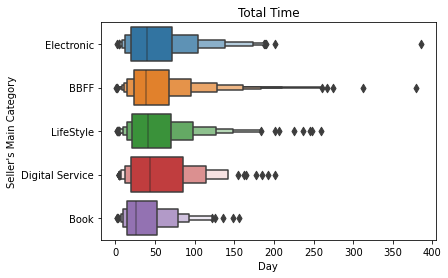

In [94]:
fig=sns.boxenplot(data=df,x='Total Time',y="Seller's Main Category")
fig.set(title='Total Time',xlabel='Day')
plt.show()

Qua ghi nhận thông tin của 2145 Sellers về thời gian kể từ khi Seller đăng ký bán hàng trên sàn TMĐT ABC đến khi sản phẩm đầu tiên của họ đến với tay khách hàng, ta nhận thấy:
- Thời gian trung bình từ khi Seller đăng ký bán hàng đến khi phát sinh giao dịch đầu tiên là 39 ngày.


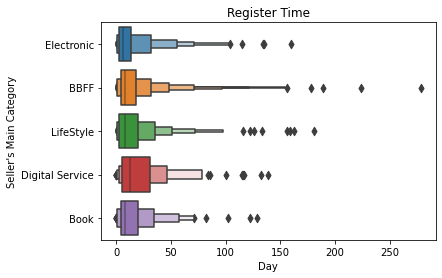

In [95]:
fig=sns.boxenplot(data=df,x='Register',y="Seller's Main Category")
fig.set(title='Register Time',xlabel='Day')
plt.show()

Bước tốn nhiều thời gian nhất là khi Chờ account bán hàng được kích hoạt bởi team ABC, trong đó: 
Có một nửa số tài khoản được xác nhận trong vòng 8 ngày (~1 tuần) và 19 ngày là khoảng thời gian 75% số đề nghị được ghi nhận. Tuy nhiên, 25% số đề nghị còn lại bị xử lý khá chậm chễ, dao động trong khoảng thời gian tương đối lớn, từ 20 ngày (~3 tuần) đến cá biệt có những đơn hàng chỉ được chấp nhận sau 278 ngày (~9 tháng) thuộc Category BBFF (Nhóm ngành có sự biến động lớn về thời gian đăng ký) hoặc Category Digital Service cũng có thời gian phê duyệt lâu hơn các ngành hàng khác.


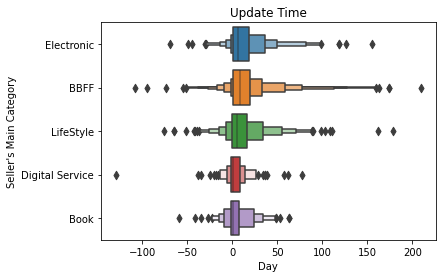

In [96]:
fig=sns.boxenplot(data=df,x='Update',y="Seller's Main Category")
fig.set(title='Update Time',xlabel='Day')
plt.show()

+ Bước Update thông tin về sản phẩm được thực hiện tốt hơn vì hơn một nữa đã được update chỉ trong vòng 6 ngày, thậm chí có những gian hàng đã update trước khoảng 4 tháng (129 ngày) khi tài khoản của họ được kích hoạt. Ngược lại có nhiều người bán hàng update sản phẩm sau khoảng thời gian rất muộn, đây có thể là những gian hàng có lượng sản phẩm với số lượng lớn và đa dạng mẫu mã cũng như cần những thông tin chi tiết về các sản phẩm (BBFF Category, LifeStyle).

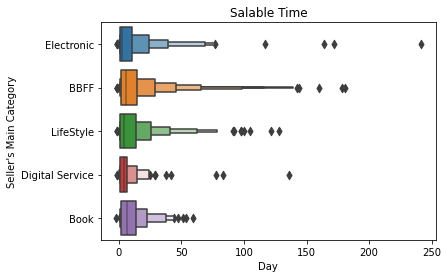

In [67]:
fig=sns.boxenplot(data=df,x='Salable',y="Seller's Main Category")
fig.set(title='Salable Time',xlabel='Day')
plt.show()

- Trung bình một nửa Gian hàng có Khoảng thời gian chuẩn bị sản phẩm để sẵn sàng bán là trong vòng 5 ngày và 25% tiếp theo được hoàn thành sau 14 ngày. 
- Hai Category là Electronic và BBFF là 2 lĩnh vực có thời gian chuẩn bị biến động nhất của toàn bộ các gian hàng.

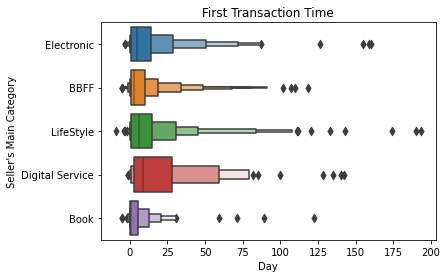

In [68]:
fig=sns.boxenplot(data=df,x='Transaction',y="Seller's Main Category")
fig.set(title='First Transaction Time',xlabel='Day')
plt.show()

- Thời gian mà gian hàng phát sinh giao dịch đầu tiên phụ thuộc chủ yếu vào ngành hàng mà họ đang kinh doanh. Trung bình 50% gian hàng sẽ phát sinh giao dịch chỉ sau 4 ngày mở bán. Có nhiều gian hàng đã phát sinh giao dịch trước cả thời gian mở bán hàng.
- Các ngành hàng như BBFF và Book với giá cả phải chăng và tiếp cận được một tệp khách hàng lớn sẽ có giao dịch nhanh hơn.
- Trong khi đó, Digital Service là sản phẩm có thời gian phát sinh giao dịch đầu tiên lâu nhất vì tính chất sản phẩm cũng như kén khách hàng hơn.
- Category LifeStyle là ngành hàng có biến động về thời gian nhận được giao dịch đầu tiên lớn nhất trong giai đoạn này.

##### BƯỚC 4: ĐỀ XUẤT CẢI THIỆN 

1. RÚT NGẮN THỜI GIAN PHÊ DUYỆT ĐĂNG KÝ BÁN HÀNG:
- Đơn giản hóa - Tối ưu hóa thủ tục đăng ký bán hàng.
- Tuyển thêm nhân sự.

2. RÚT NGẮN THỜI GIAN UPDATE THÔNG TIN SẢN PHẨM:
- Chủ động Update thông tin trong khi chờ Đơn đăng ký bán hàng được phê duyệt.
Đặc biệt với các gian hàng có mẫu mã sản phẩm đa dạng và có nhiều thông tin sản phẩm cần được update.

3. CẢI THIỆN THỜI GIAN PHÁT SINH GIAO DỊCH:
- Ưu tiên QUẢNG CÁO dành cho các gian hàng mới để tiếp cận khách hàng.
- Làm việc với Seller để áp dụng các hình thức khuyến mãi: giảm giá, free-shipping cho các đơn đặt hàng đầu tiên của gian hàng để kích thích khách hàng chi tiêu và đẩy nhanh tiến độ bán hàng.